# Area and Rent Prediction 

# Mean, VAriance, Standard Deviation and others Primary Task 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Dhaka Rent.csv')

In [3]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [4]:
df.tail()

,area,rent
55,3100,54000
56,2750,48500
57,1800,25100
58,2200,31560
59,3100,51600


In [5]:
df.area.head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [6]:
df.area.tail()

55    3100
56    2750
57    1800
58    2200
59    3100
Name: area, dtype: int64

In [7]:
df.rent.head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

In [8]:
df.rent.tail()

55    54000
56    48500
57    25100
58    31560
59    51600
Name: rent, dtype: int64

In [9]:
df.area.mean()

2289.0

In [10]:
df.area.std()

538.8805093801691

In [11]:
df.area.var()

290392.2033898305

In [12]:
df.describe()

,area,rent
count,60.000000,60.000000
mean,2289.000000,37269.166667
std,538.880509,11770.736234
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2130.000000,34450.000000
75%,2700.000000,47625.000000
max,3500.000000,70500.000000


In [13]:
df.shape

(60, 2)

In [14]:
row, col = df.shape

In [15]:
row

60

In [16]:
col

2

In [17]:
df.isnull().sum()

area    0
rent    0
dtype: int64

# Visualization: 

Text(0.5, 1.0, 'Rent According to the Area')

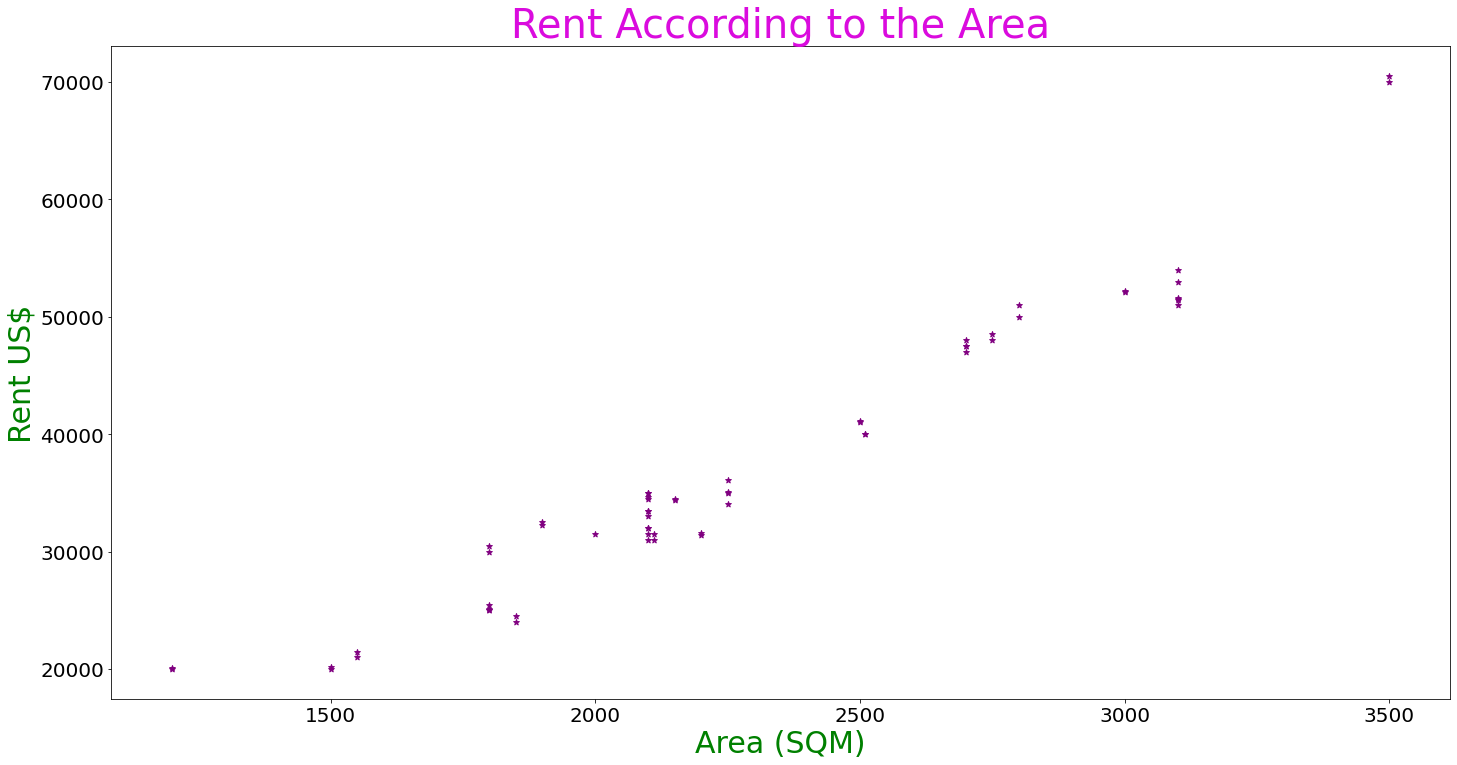

In [18]:
plt.figure(figsize = (24,12))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.scatter(df.area, df.rent, color= '#800080', marker = '*')
plt.xlabel(('Area (SQM)'), color = 'green', fontsize = 30)
plt.ylabel('Rent US$', color = 'green', fontsize = 30)
plt.title('Rent According to the Area', color = '#DA0BDE', fontsize = 40)

In [19]:
x = df[['area']]
y = df['rent']

In [20]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [21]:
y.head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

# Split the Dataset into Train & Test

In [22]:
from sklearn.model_selection import train_test_split as tts

In [23]:
# train 70% ; test = 30%
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=.30)

In [24]:
xtrain.head()

,area
52,3500
55,3100
45,3100
44,2250
39,2100


In [25]:
ytrain.head()

52    70500
55    54000
45    51000
44    35000
39    31500
Name: rent, dtype: int64

# Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
reg = LinearRegression()

In [28]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [29]:
m = reg.coef_
m

array([22.09809917])

In [30]:
c = reg.intercept_
c

-13362.94334739125

In [31]:
x1 = 2510
y = m*x1 + c 
y

array([42103.28557645])

In [32]:
import warnings
warnings.filterwarnings('ignore')
reg.predict([[2100]])

array([33043.06491558])

In [33]:
pred = reg.predict(xtest)

In [34]:
pred

array([19784.20541187, 13154.77566002, 55141.16408842, 26413.63516373,
       46301.92441929, 33264.04590731, 46301.92441929, 30833.2549983 ,
       35252.87483287, 46301.92441929, 26413.63516373, 28623.44508101,
       20889.11037052, 19784.20541187, 55141.16408842, 26413.63516373,
       26413.63516373, 36357.77979151])

In [35]:
df['predicted_result'] = reg.predict(x)

In [36]:
df.head()

,area,rent,predicted_result
0,2000,31500,30833.254998
1,2100,35000,33043.064916
2,2500,41050,41882.304585
3,2250,36100,36357.779792
4,3000,52100,52931.354171


In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [38]:
mse = mean_squared_error(ytest, pred)

In [39]:
mse

7354162.693946639

In [40]:
mae = mean_absolute_error(ytest, pred)

In [41]:
mae

2069.4182691405313

# Best Fit Line

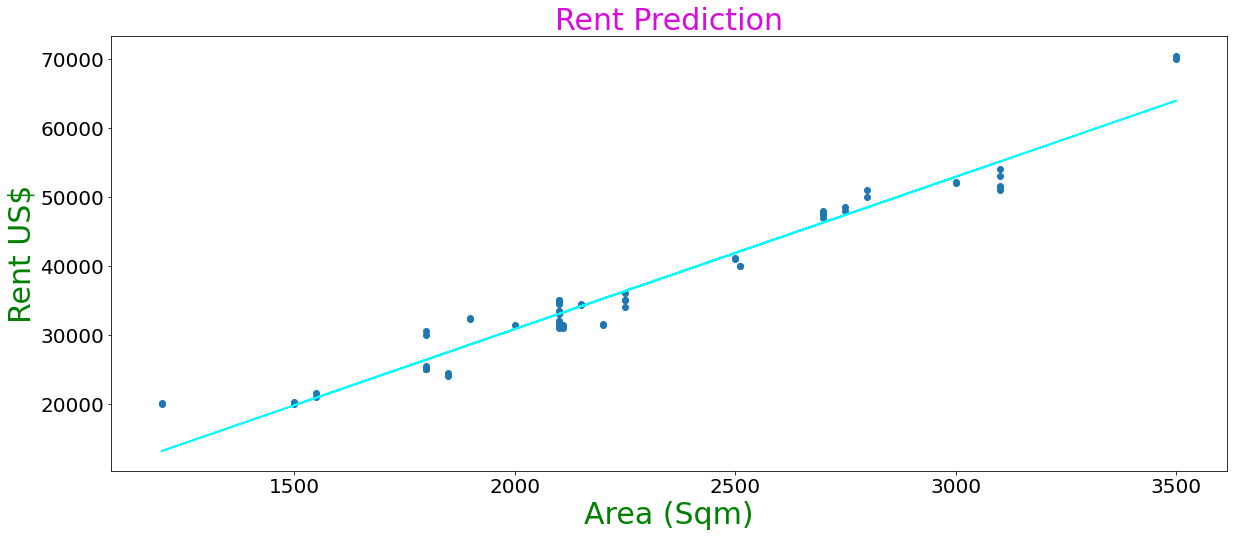

In [42]:
plt.figure(figsize = (20,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.scatter(df.area, df.rent)
plt.xlabel(('Area (Sqm)'), color = 'green', fontsize = 30)
plt.ylabel('Rent US$', color = 'green', fontsize = 30)
plt.title('Rent Prediction', color = '#DA0BDE', fontsize = 30)
plt.plot(df.area , reg.predict(df[['area']]), color = '#00FFFF')

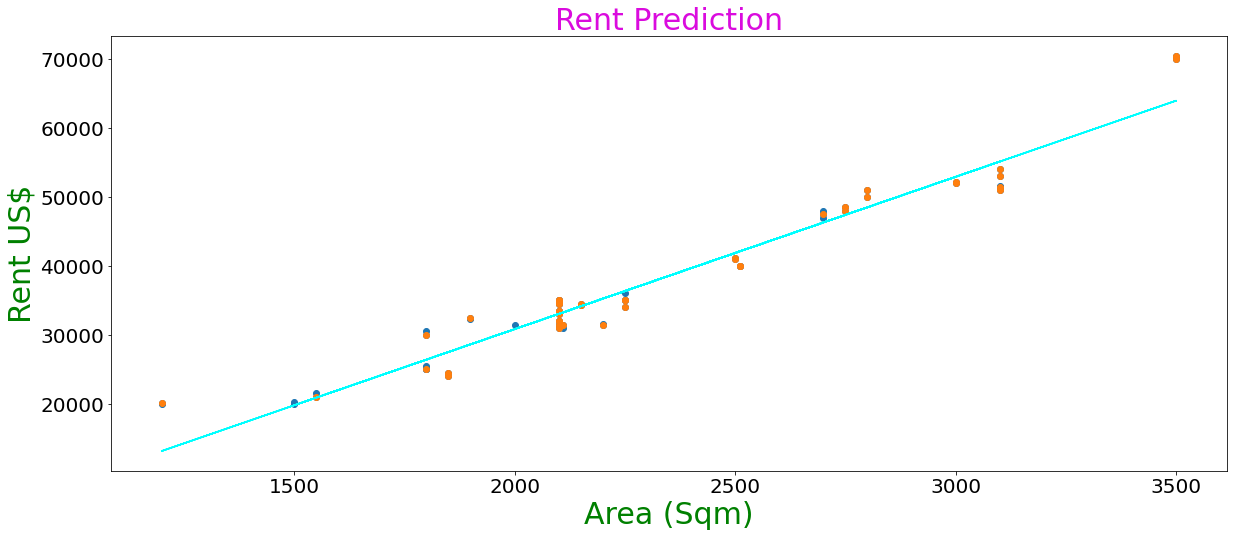

In [43]:
plt.figure(figsize = (20,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.scatter(df.area, df.rent)
plt.xlabel(('Area (Sqm)'), color = 'green', fontsize = 30,)
plt.ylabel('Rent US$', color = 'green', fontsize = 30,)
plt.title('Rent Prediction', color = '#DA0BDE', fontsize = 30)
plt.plot(df.area , reg.predict(df[['area']]), color = '#00FFFF',)
plt.scatter(xtrain, ytrain)